# 1) Problem statement of medical insurance dataset

# 2) Import Liberies

In [138]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


import pickle
import json

# 3) Data Gathering

In [139]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [141]:
df.shape

(1338, 7)

In [142]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 4) Exploratary data analysis

In [143]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [144]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [145]:
df['sex'].replace({'female': 0, 'male':1}, inplace= True)

In [146]:
df['sex'].dtype

dtype('int64')

In [147]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [148]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [149]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [150]:
df['smoker'].replace({'no':0 , 'yes': 1}, inplace= True)

<AxesSubplot:xlabel='region', ylabel='charges'>

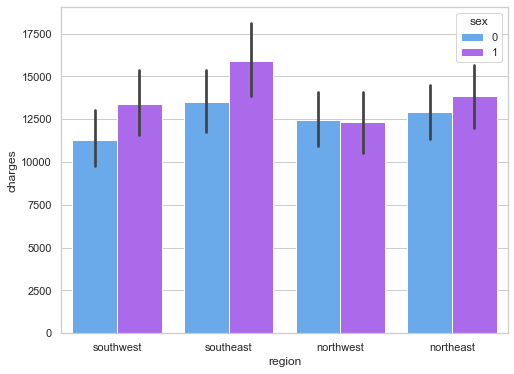

In [151]:
# checking for relation between region and charges with respective sex feature
plt.figure(figsize = (8,6))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'cool')

Text(0.5, 1.0, 'Distribution of charges')

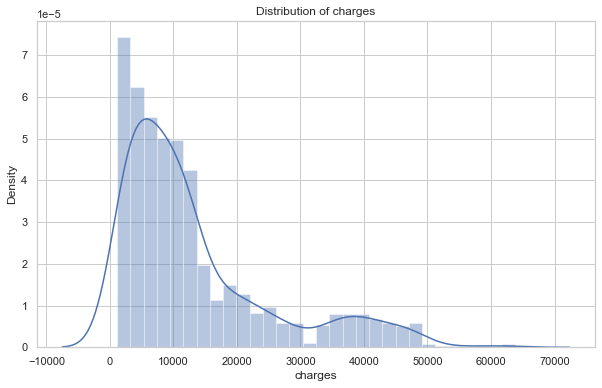

In [152]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,6))
sns.distplot(df['charges'], kde = True)
plt.title("Distribution of charges")

<AxesSubplot:xlabel='region', ylabel='charges'>

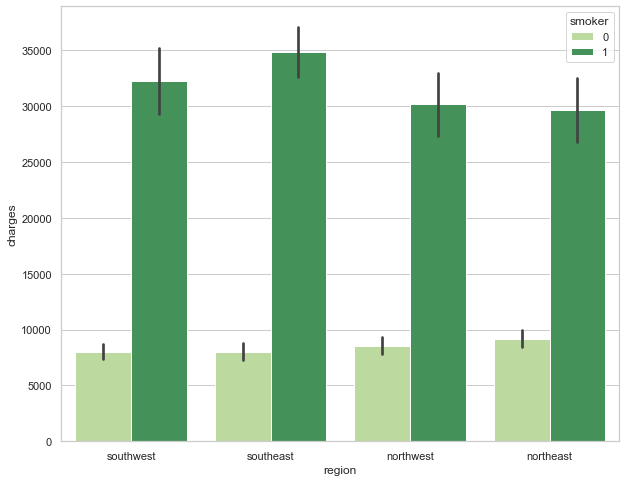

In [153]:
# checking for relation between region and charges with respective smoker feature
plt.figure(figsize = (10,8))
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'YlGn')

In [154]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [155]:
df = pd.get_dummies(df, columns = ['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


# 5) Feature engineering

# 6) Feature selection

In [156]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


## 1.Linearity

<AxesSubplot:>

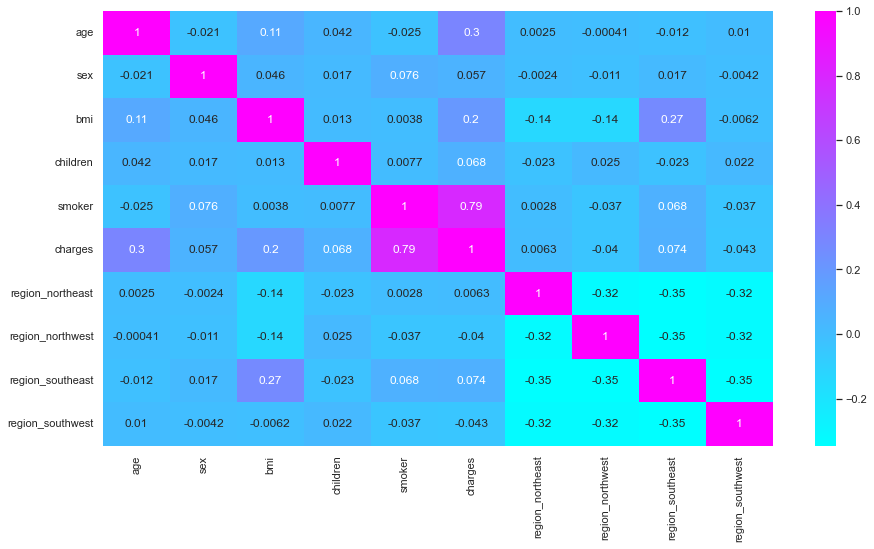

In [157]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'cool')

## 2. No Multicolinearity

In [158]:
# In this we need to find VIF = Variance Inflation Factor

In [159]:
df1 = df.drop("charges", axis =1)

In [160]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

<AxesSubplot:>

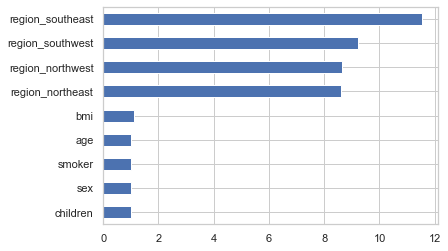

In [161]:
vif_list = []
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(), i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, df1.columns)
s1.sort_values().plot(kind = 'barh')

## Train test split

In [162]:
x = df.drop('charges', axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [163]:
print(x_train.shape)
print(x_test.shape)

(1070, 9)
(268, 9)


# 7) Model Training

## 1] Linear Regression algorithm

In [164]:
Linear_reg = LinearRegression()
Linear_reg.fit(x_train, y_train)

LinearRegression()

#### Model evaluation

In [165]:
# Evaluation on test data with Linear_reg

y_pred = Linear_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)


MSE: 30680789.794293575
RMSE: 5539.024263739379
MAE: 4042.2001735308127
R_squared 0.7959688488543415


In [166]:
# Evaluation on training data Linear_reg

y_pred_train = Linear_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 38042746.55788901
RMSE: 6167.880232129107
MAE: 4267.358108206104
R_squared 0.7386584208518752


<AxesSubplot:>

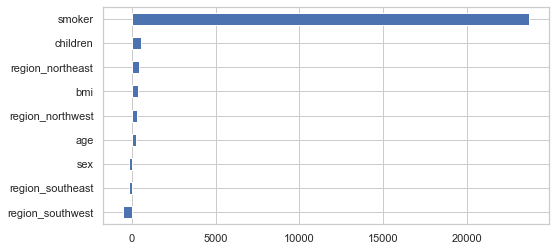

In [167]:
s2 = pd.Series(Linear_reg.coef_, index = x.columns)
plt.figure(figsize = (8,4))
s2.sort_values().plot(kind = 'barh')

## 1.1] Ridge Regression

In [168]:
ridge_reg = Ridge(alpha=1.0) # alpha == lambda
ridge_reg.fit(x_train, y_train)

Ridge()

In [169]:
# Evaluation on test data with ridge reg

y_pred = ridge_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 30712467.733692292
RMSE: 5541.883049441975
MAE: 4054.563482145522
R_squared 0.7957581865316055


In [170]:
# Evaluation on training data ridge reg

y_pred_train = ridge_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 38045781.19622034
RMSE: 6168.126230567946
MAE: 4277.131382124724
R_squared 0.7386375738509245


### Ridge Regression with HyperParamer Tuning

In [171]:
ridge_reg_HP = Ridge()
parameters = {'alpha': np.arange(0.01,3,0.01)}
gscv_ridge = GridSearchCV(ridge_reg_HP, parameters, cv= 5)
gscv_ridge.fit(x_train, y_train)
gscv_ridge.best_estimator_

Ridge(alpha=1.17)

###### Ridge Regression After tuning alpha value

In [172]:
ridge_reg_HP = Ridge(alpha=1.17)
ridge_reg_HP.fit(x_train,y_train)

Ridge(alpha=1.17)

In [173]:
# Evaluation on test data with ridge reg_HP

y_pred = ridge_reg_HP.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 30718428.067390278
RMSE: 5542.4207768257975
MAE: 4056.650733281994
R_squared 0.7957185495550554


In [174]:
# Evaluation on training data ridge reg_HP

y_pred_train = ridge_reg_HP.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 38046892.45985257
RMSE: 6168.2163110458905
MAE: 4278.787815963722
R_squared 0.7386299398229226


## 1.2] Lasso Regression

In [175]:
lasso_reg = Lasso() # alpha = defalt value = 0.1
lasso_reg.fit(x_train, y_train)

Lasso()

In [176]:
# Evaluation on test data with lasso reg

y_pred = lasso_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 30683088.10917618
RMSE: 5539.231725535246
MAE: 4042.4122839657443
R_squared 0.7959535647682949


In [177]:
# Evaluation on training data lasso reg

y_pred_train = lasso_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 38042775.43067966
RMSE: 6167.88257270513
MAE: 4267.615872937022
R_squared 0.7386582225049789


### Lasso Regression with HyperParamer Tuning

In [178]:
lasso_reg_HP = Lasso()

param_lasso = {'alpha': np.arange(0.01,3,0.01)}

gscv_lasso = GridSearchCV(lasso_reg_HP, param_lasso, cv = 5)
gscv_lasso.fit(x_train, y_train)
gscv_lasso.best_estimator_

Lasso(alpha=2.9899999999999998)

###### Lasso Regression After tuning alpha valu

In [179]:
lasso_reg_HP = Lasso(alpha=2.9899)
lasso_reg_HP.fit(x_train, y_train)

Lasso(alpha=2.9899)

In [180]:
# Evaluation on test data with lasso reg_HP

y_pred = lasso_reg_HP.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 30687807.78885854
RMSE: 5539.657732103901
MAE: 4042.834551496414
R_squared 0.7959221782986151


In [181]:
# Evaluation on training data lasso reg_HP

y_pred_train = lasso_reg_HP.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 38043004.54156902
RMSE: 6167.901145573672
MAE: 4268.129325042451
R_squared 0.7386566485859787


<AxesSubplot:>

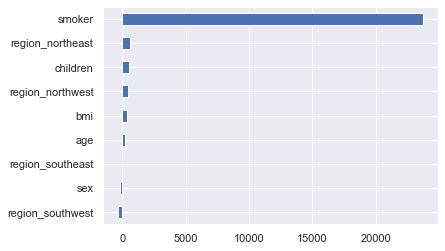

In [182]:
sns.set(style = 'darkgrid')
s3 = pd.Series(lasso_reg_HP.coef_, index=x.columns)
s3.sort_values().plot(kind = 'barh')


## 3. Normality of residual

In [183]:
# Residual = ya- yp
Residual = y_train - y_pred_train

In [184]:
Residual

1204   -8549.334879
829      498.396832
1077     -67.730252
416    -2852.757490
1295    1776.740513
           ...     
1242    1816.951227
924      512.005012
1247   -1565.905114
271     6810.724938
474    -9124.391378
Name: charges, Length: 1070, dtype: float64

###### Kdeplot

<AxesSubplot:xlabel='charges', ylabel='Density'>

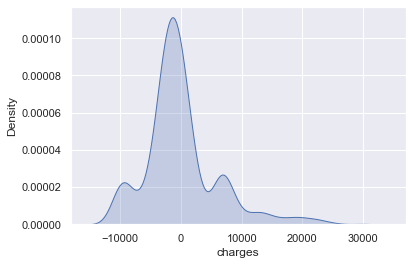

In [185]:
sns.kdeplot(Residual , fill = True)

###### Hypothesis testing

#####  a) shapiro

In [186]:
from scipy.stats import shapiro

In [187]:
_, p_val = shapiro(Residual)
print('P value :', p_val)

if p_val >= 0.05:
    print(" Data is normally distributed")
else:
    print("Data is not normally distributed ")

P value : 1.5938652633846685e-26
Data is not normally distributed 


###### b) kstest

In [188]:
from scipy.stats import kstest

In [189]:
_, p_val = kstest(Residual, 'norm')
print('P value :', p_val)

if p_val >= 0.05:
    print(" Data is normally distributed")
else:
    print("Data is not normally distributed ")

P value : 0.0
Data is not normally distributed 


##### c) Normaltest

In [190]:
from scipy.stats import normaltest

In [191]:
_, p_val = normaltest(Residual)
print('P value :', p_val)

if p_val >= 0.05:
    print(" Data is normally distributed")
else:
    print("Data is not normally distributed ")

P value : 2.7810403597568566e-56
Data is not normally distributed 


###### QQ plot

In [192]:
import statsmodels.api as sm

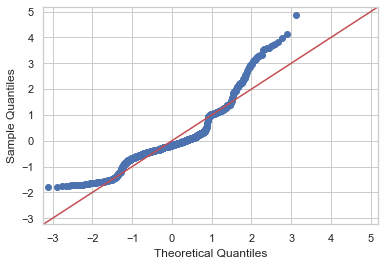

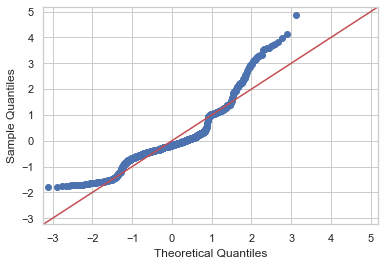

In [193]:
sns.set( style = 'whitegrid')
sm.qqplot(Residual, line = '45', fit =True)

## 4. Homoscadesticity

<AxesSubplot:xlabel='charges', ylabel='charges'>

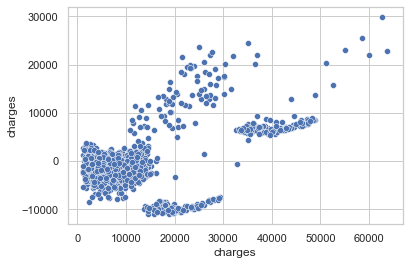

In [194]:
sns.scatterplot(x= y_train, y = Residual)

## 2] KNN algorithm

In [195]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [196]:
# Evaluation on test data with KNN reg

y_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 127705622.77765983
RMSE: 11300.691252204877
MAE: 7983.086927160447
R_squared 0.1507413792866117


In [197]:
# Evaluation on training data KNN reg

y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 82786604.3711156
RMSE: 9098.714435079035
MAE: 6198.684399394393
R_squared 0.43128233694336693


### Scaling

### 1> Satnaderdization

In [198]:
std_scalar = StandardScaler()
std_scalar.fit(x_train) 

array_std =std_scalar.transform(x_train)
std_train_xdf = pd.DataFrame(array_std, columns = x_train.columns)
std_train_xdf

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.493852,-1.009390,-0.549609,1.579659,1.982644,-0.563679,-0.567997,1.647810,-0.570875
1,0.012266,0.990697,-1.449233,-0.082322,-0.504377,-0.563679,1.760573,-0.606866,-0.570875
2,-1.278692,0.990697,-0.756705,-0.913313,-0.504377,1.774059,-0.567997,-0.606866,-0.570875
3,0.944625,0.990697,0.580306,-0.913313,-0.504377,-0.563679,-0.567997,1.647810,-0.570875
4,-1.350412,0.990697,-1.424381,-0.082322,-0.504377,-0.563679,-0.567997,-0.606866,1.751697
...,...,...,...,...,...,...,...,...,...
1065,-1.206972,-1.009390,-1.543669,1.579659,-0.504377,-0.563679,1.760573,-0.606866,-0.570875
1066,0.299146,0.990697,-1.225570,-0.913313,-0.504377,-0.563679,-0.567997,-0.606866,1.751697
1067,-0.418053,0.990697,-0.198375,2.410650,-0.504377,-0.563679,-0.567997,-0.606866,1.751697
1068,0.801185,0.990697,0.596873,0.748668,1.982644,-0.563679,-0.567997,-0.606866,1.751697


In [199]:
knn_reg_std = KNeighborsRegressor()
knn_reg_std.fit(std_train_xdf, y_train)

KNeighborsRegressor()

In [200]:
# Evaluation on training data KNN reg std

y_pred_train = knn_reg_std.predict(std_train_xdf)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 21721578.014651738
RMSE: 4660.641373743719
MAE: 2864.1601360859813
R_squared 0.8507796619967999


In [201]:
# Evaluation on test data with KNN reg std

array1_std = std_scalar.transform(x_test)
std_test_xdf = pd.DataFrame(array1_std, columns = x.columns)

y_pred = knn_reg_std.predict(std_test_xdf)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 21143784.834844206
RMSE: 4598.237144259113
MAE: 2928.1186735708957
R_squared 0.8593911438279939


## KNN with  Hyperparameter tuning

In [202]:
knn_reg_HP = KNeighborsRegressor()

hyperparameter = {'n_neighbors': np.arange(3,21), 'p': [1,2]}

rscv_knn_reg_std = RandomizedSearchCV(knn_reg_HP,hyperparameter,cv =5)

rscv_knn_reg_std.fit(std_train_xdf, y_train)
rscv_knn_reg_std.best_estimator_


KNeighborsRegressor(n_neighbors=6)

In [203]:
knn_reg_HP = KNeighborsRegressor(n_neighbors=6, p=1)
knn_reg_HP.fit(std_train_xdf, y_train)

KNeighborsRegressor(n_neighbors=6, p=1)

In [204]:
# Evaluation on training data KNN reg with HP

y_pred_train = knn_reg_HP.predict(std_train_xdf)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 23684820.86512259
RMSE: 4866.705339870351
MAE: 2978.0650990264794
R_squared 0.8372928075181786


In [205]:
# Evaluation on test data with KNN reg with HP

y_pred = knn_reg_std.predict(std_test_xdf)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 21143784.834844206
RMSE: 4598.237144259113
MAE: 2928.1186735708957
R_squared 0.8593911438279939


# 3] Decision Tree

In [206]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [207]:
# Evaluation on training data with DT

y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 244239.55438233944
RMSE: 494.20598375812835
MAE: 29.572515327102803
R_squared 0.9983221518789243


In [208]:
# Evaluation on test data with DT

y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 29615762.41392448
RMSE: 5442.036605345877
MAE: 2504.7461812649253
R_squared 0.8030514162809065


### Plot Decision tree

In [209]:
# plt.figure(figsize = (200,150))
# plot_tree(dt_reg, feature_names=x.columns, class_names=['0','1'], filled=True)
# plt.savefig("Decision tree wthout HP")

In [210]:
dt_reg.feature_importances_

array([0.12466352, 0.00448478, 0.21308106, 0.02994805, 0.61483733,
       0.00356431, 0.00501393, 0.003009  , 0.00139803])

In [211]:
dt_reg.get_depth()

18

### Hyperparameter Tuning 

In [212]:


hyperparameters ={ "criterion" :['mse','mae'],
     'max_depth': np.arange(3,14),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}

gscv_dt_reg = GridSearchCV(dt_reg,hyperparameters, cv = 5)
gscv_dt_reg.fit(x_train, y_train)
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=6,
                      min_samples_split=4)

In [213]:
dt_reg_HP= gscv_dt_reg.best_estimator_
dt_reg_HP.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=6,
                      min_samples_split=4)

In [214]:
# Evaluation on training data DT with HP

y_pred_train = dt_reg_HP.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 20558267.2554694
RMSE: 4534.122545263791
MAE: 2680.8581216787034
R_squared 0.8587712372207941


In [215]:
# Evaluation on test data DT with HP

y_pred = dt_reg_HP.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 14867206.530212695
RMSE: 3855.8016715350773
MAE: 2405.0202814725235
R_squared 0.9011311872015846


In [216]:
plt.figure(figsize=(200,150))
plot_tree(dt_reg_HP,feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('DT_Regression_HYP.png')

### Pruning

In [217]:
dt_reg_prun = DecisionTreeRegressor(random_state=10)
dt_reg_prun.fit(x_train, y_train)

DecisionTreeRegressor(random_state=10)

In [218]:
result = dt_reg_prun.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']

In [219]:
train_accuracy_list = []
test_accuracy_list = []

for ccp_alpha in ccp_alpha_list:
    dt_reg_ccp =  DecisionTreeRegressor(random_state = 10, ccp_alpha= ccp_alpha)
    dt_reg_ccp.fit(x_train, y_train)
    train_accuracy_list.append(dt_reg_ccp.score(x_train, y_train))
    test_accuracy_list.append(dt_reg_ccp.score(x_test, y_test))

train_accuracy_list
# test_accuracy_list

[0.9983221518789243,
 0.9983221518788683,
 0.9983221518788123,
 0.9983221518787563,
 0.9983221518787003,
 0.9983221518786253,
 0.9983221518784015,
 0.9983221518781012,
 0.998322151877543,
 0.9983221518769848,
 0.9983221518763405,
 0.9983221518756651,
 0.9983221518749896,
 0.9983221518743142,
 0.9983221518734187,
 0.998322151872523,
 0.9983221518713289,
 0.9983221518699295,
 0.99832215186853,
 0.9983221518664436,
 0.9983221518637008,
 0.9983221518603044,
 0.9983221518566271,
 0.9983221518529497,
 0.9983221518492724,
 0.9983221518453029,
 0.9983221518413334,
 0.9983221518365304,
 0.9983221518317273,
 0.9983221518267035,
 0.9983221518206246,
 0.998322151807293,
 0.99832215180052,
 0.9983221517930152,
 0.9983221517839345,
 0.9983221517744746,
 0.9983221517650146,
 0.9983221517545328,
 0.9983221517440509,
 0.998322151733244,
 0.9983221517224371,
 0.9983221517114659,
 0.9983221517004947,
 0.9983221516895234,
 0.9983221516778618,
 0.9983221516652673,
 0.9983221516525842,
 0.9983221516378457,


In [220]:
dt_reg_prun = DecisionTreeRegressor(random_state=10,ccp_alpha=ccp_alpha_list[314])
dt_reg_prun.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=26.78997936594152, random_state=10)

### Graphical Representation

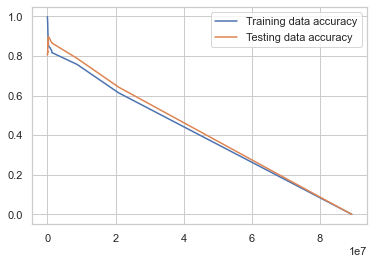

In [221]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training data accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing data accuracy")
ax.legend()

In [222]:
# Evaluation on training data DT with pruning

y_pred_train = dt_reg_prun.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 245886.65111997744
RMSE: 495.86959084014967
MAE: 51.31694462620871
R_squared 0.9983108368477719


In [223]:
# Evaluation on test data DT with pruning

y_pred = dt_reg_prun.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 29068848.805074316
RMSE: 5391.553468627972
MAE: 2458.1494345535148
R_squared 0.8066884612833034


# 4. Random Forest

In [224]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [225]:
# Evaluation on training data with random forest

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 3644387.9545472832
RMSE: 1909.0280130336703
MAE: 1067.9563705138003
R_squared 0.9749642129119017


In [226]:
# Evaluation on test data with  random forest

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 16659396.533873394
RMSE: 4081.5924017316324
MAE: 2295.7128361866608
R_squared 0.8892128959199617


### Hyperparameter Tunning

In [227]:
hyperparameters = { "n_estimators": np.arange(90,120),
                   'criterion': ['mse', 'mae'], 
                   'max_depth': np.arange(3,8),
                   'min_samples_leaf':np.arange(3,8),
                   'random_state':[11]}

rscv_rf_reg = RandomizedSearchCV(rf_reg, hyperparameters, cv= 5)
rscv_rf_reg.fit(x_train, y_train)
rscv_rf_reg.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=4, min_samples_leaf=5,
                      random_state=11)

In [228]:
rf_reg_HP = RandomForestRegressor(criterion='mse', max_depth=4, min_samples_leaf=6,
                      n_estimators=99, random_state=11)
rf_reg_HP.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=4, min_samples_leaf=6,
                      n_estimators=99, random_state=11)

In [229]:
# Evaluation on training data Random state with HP

y_pred_train =rf_reg_HP.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 19466495.807869855
RMSE: 4412.085199525261
MAE: 2504.278555080631
R_squared 0.8662713601088806


In [230]:
# Evaluation on test data with Random state with HP

y_pred = rf_reg_HP.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 14105661.979450515
RMSE: 3755.75052146046
MAE: 2283.1903373739888
R_squared 0.9061955552436879


# conclusion

In [235]:
models = [Linear_reg,knn_reg_HP,dt_reg_HP,rf_reg_HP]
list_models = ['Linear_reg','knn_reg_HP','dt_reg_HP','rf_reg_HP']
accuracy_train = []
accuracy_test = []
# precision_train = []
# precision_test= []

for i in models:
    accuracy = i.score(x_train,y_train)
    accuracy_train.append(accuracy*100)
#     print(accuracy)
    accuracy = i.score(x_test,y_test)
    accuracy_test.append(accuracy*100)
#     print(accuracy)
s1 = pd.Series(accuracy_train,index = list_models)
s2 = pd.Series(accuracy_test,index = list_models)

##### train result

<AxesSubplot:>

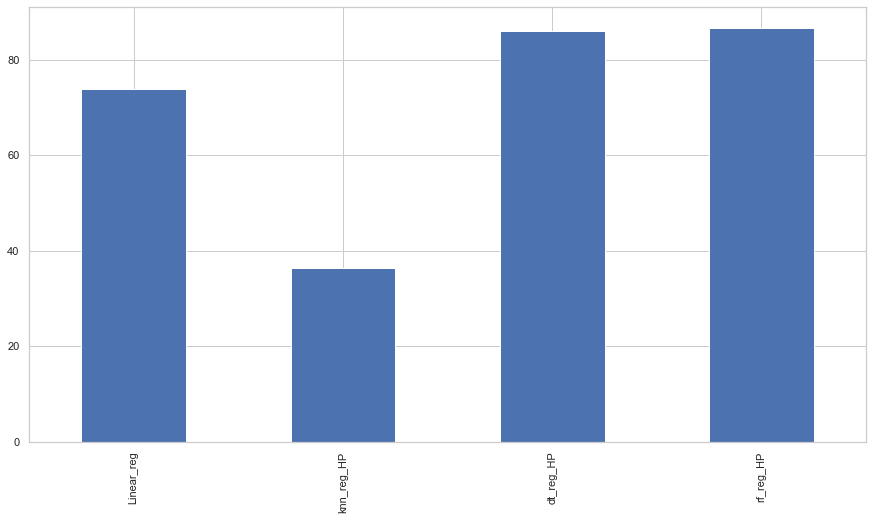

In [236]:
plt.figure(figsize = (15,8))
s1.plot(kind = 'bar')

<AxesSubplot:ylabel='None'>

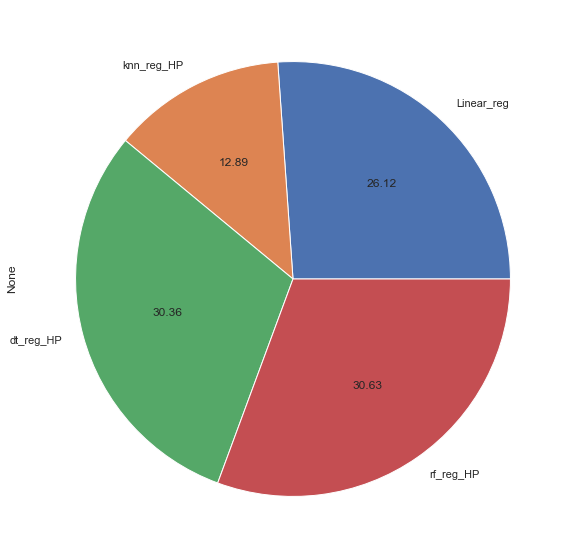

In [237]:
plt.figure(figsize = (10,10))
s1.plot(kind = 'pie', autopct = '%.2f')

##### test result

<AxesSubplot:>

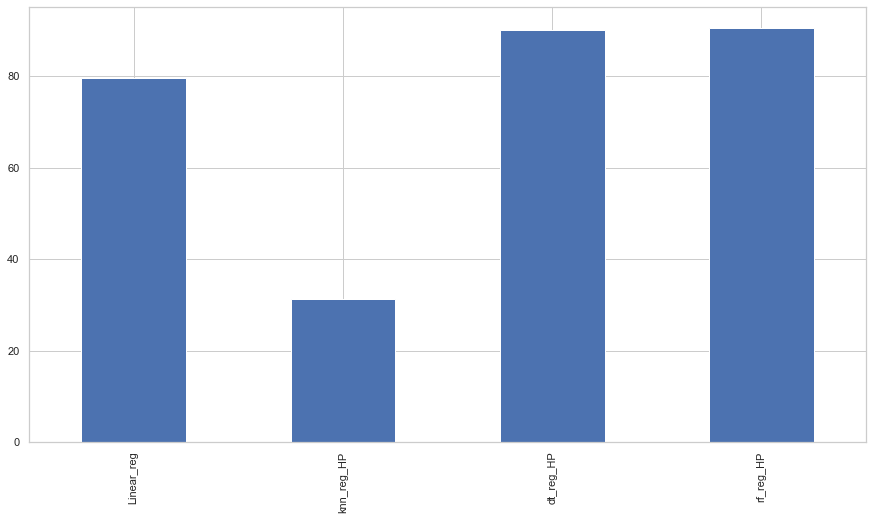

In [239]:
plt.figure(figsize = (15,8))
s2.plot(kind = 'bar')

<AxesSubplot:ylabel='None'>

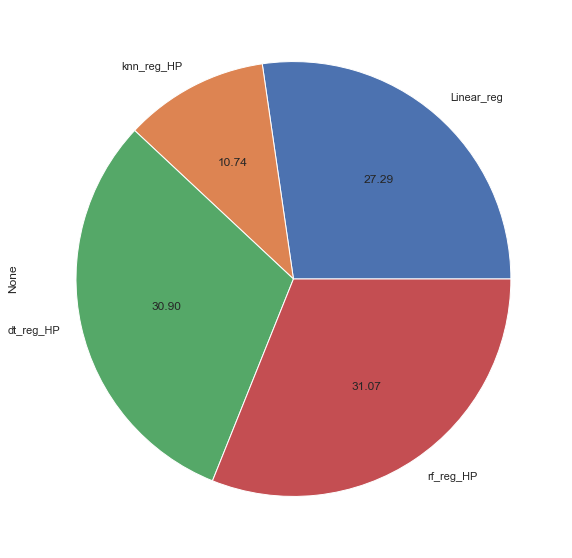

In [240]:
plt.figure(figsize = (10,10))
s2.plot(kind = 'pie', autopct = '%.2f')

#### From above bar chart and pie chart we are getting good result on decisiion tree and random forest hyperparameter

## single row testing

In [241]:
df.iloc[8]

age                   37.0000
sex                    1.0000
bmi                   29.8300
children               2.0000
smoker                 0.0000
charges             6406.4107
region_northeast       1.0000
region_northwest       0.0000
region_southeast       0.0000
region_southwest       0.0000
Name: 8, dtype: float64

In [246]:
age = 67.0
sex = 'male'
bmi = 28.3
children = 3
smoker = 'yes'
region = 'southeast'

# charges = ?

In [247]:
project_data = {"sex": {'female': 0, 'male':1},
                "smoker": {'no':0 , 'yes': 1},
               "columns": list(x.columns)}

In [248]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [252]:
region = "region_" + region
region_index = np.where(column_names == region)[0]

In [254]:
test_array = np.zeros(x.shape[1])

test_array[0] = age
test_array[1] = project_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = project_data['smoker'][smoker]
test_array[region_index] =1

test_array

array([67. ,  1. , 28.3,  3. ,  1. ,  0. ,  0. ,  0. ,  0. ])

In [255]:
rf_reg_HP.predict([test_array])

array([26854.93557679])

In [256]:
with open("randomforest_HP.pkl", 'wb') as f:
    pickle.dump(rf_reg_HP,f)

In [258]:
with open("project_data.json", 'w') as f:
    json.dump(project_data,f)